In [13]:
from seaborn import heatmap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv('data.csv', encoding="ISO-8859-1")

# Initial Data Cleaning

In [6]:
test_df=df[['match','iid','gender','wave', 'round','order', 'partner','pid','samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 
 'pf_o_fun', 'pf_o_amb', 'pf_o_sha','age', 'field_cd','race', 'imprace', 'imprelig', 'goal', 'date', 'go_out','career_c',
 'exphappy', 'expnum','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1','amb3_1']]
test_df.reset_index(inplace=True)

In [7]:
test_df=test_df[~test_df.pid.isnull()]
test_df = test_df[~test_df.age_o.isnull()]
test_df = test_df[~test_df.pf_o_att.isnull()]
test_df = test_df[~test_df.age.isnull()]
test_df = test_df[~test_df.attr1_1.isnull()]
test_df= test_df[~test_df.attr3_1.isnull()]

In [8]:
test_df.field_cd = test_df.field_cd.replace(np.NaN, 18)
test_df.career_c= test_df.career_c.replace(np.NaN, 10)
test_df.date = test_df.date.replace(np.NaN, 7) 

In [102]:
df.columns

Index(['index', 'match', 'iid', 'gender', 'wave', 'round', 'order', 'partner', 'pid', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1'], dtype='object')

In [9]:
test_df = test_df.fillna(0)

In [11]:
test_df.reset_index(inplace=True)
test_df = test_df[['match','iid','gender','wave', 'round','order', 'partner','pid','samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 
 'pf_o_fun', 'pf_o_amb', 'pf_o_sha','age', 'field_cd','race', 'imprace', 'imprelig', 'goal', 'date', 'go_out','career_c',
 'exphappy', 'expnum','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1','amb3_1']]

In [12]:
test_df.describe()

,match,iid,gender,wave,round,order,partner,pid,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
count,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000
mean,0.163507,284.147377,0.499384,11.372568,16.947057,8.965772,9.024501,284.196750,0.399532,26.366412,2.763605,22.435886,17.394533,20.281027,17.409604,10.706986,11.813227,26.363211,7.698843,2.763482,3.801650,3.658828,2.105639,5.030042,2.161537,5.306082,5.526594,1.188377,22.284569,17.428269,20.315870,17.440261,10.737274,11.837482,30.157886,13.300719,14.482013,18.442008,11.771876,11.890927,7.084954,8.296725,7.703152,8.410613,7.579168
std,0.369850,157.917288,0.500030,5.968379,4.300429,5.481636,5.519621,157.952345,0.489832,3.561128,1.233592,12.573945,7.027070,6.797941,6.105894,6.104702,6.386570,3.564843,3.777381,1.234117,2.851137,2.798174,1.385687,1.432325,1.106120,3.331185,1.727058,3.166748,12.115490,6.993209,6.739381,6.067064,6.090796,6.379141,15.998114,6.939886,6.212063,6.515039,6.894257,6.179234,1.398866,1.412161,1.566932,1.076761,1.781003
min,0.000000,1.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000
25%,0.000000,157.000000,0.000000,7.000000,15.000000,4.000000,4.000000,157.000000,0.000000,24.000000,2.000000,15.000000,15.000000,17.390000,15.000000,5.000000,8.510000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,5.000000,0.000000,15.000000,15.000000,17.500000,15.000000,5.000000,9.090000,20.000000,10.000000,10.000000,15.000000,6.000000,10.000000,6.000000,8.000000,7.000000,8.000000,7.000000
50%,0.000000,280.000000,0.000000,11.000000,18.000000,8.000000,8.000000,280.000000,0.000000,26.000000,2.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.585000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,6.000000,6.000000,0.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,25.000000,15.000000,15.000000,20.000000,10.000000,10.000000,7.000000,8.000000,8.000000,8.000000,8.000000
75%,0.000000,407.000000,1.000000,15.000000,20.000000,13.000000,13.000000,408.000000,1.000000,28.000000,4.000000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000,28.000000,10.000000,4.000000,6.000000,6.000000,2.000000,6.000000,3.000000,7.000000,7.000000,0.000000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000,40.000000,18.750000,20.000000,20.000000,15.000000,15.790000,8.000000,9.000000,9.000000,9.000000,9.000000
max,1.000000,552.000000,1.000000,21.000000,22.000000,22.000000,22.000000,552.000000,1.000000,55.000000,6.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,55.000000,18.000000,6.000000,10.000000,10.000000,6.000000,7.000000,7.000000,17.000000,10.000000,20.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,100.000000,50.000000,40.000000,50.000000,50.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# EDA

In [42]:
test_df.groupby(['gender','attr3_1']).match.value_counts(normalize=True)

gender  attr3_1  match
0       2.0      0        1.000000
        3.0      0        0.887324
                 1        0.112676
        4.0      0        0.845070
                 1        0.154930
        5.0      0        0.814815
                 1        0.185185
        6.0      0        0.846690
                 1        0.153310
        7.0      0        0.850356
                 1        0.149644
        8.0      0        0.821486
                 1        0.178514
        9.0      0        0.819549
                 1        0.180451
        10.0     0        0.892308
                 1        0.107692
1       2.0      0        1.000000
        3.0      0        0.972222
                 1        0.027778
        4.0      0        0.837349
                 1        0.162651
        5.0      0        0.881443
                 1        0.118557
        6.0      0        0.783890
                 1        0.216110
        7.0      0        0.833438
                 1        0.1665

In [55]:
test_df[(test_df.gender==0)].groupby(['attr3_1']).match.value_counts(normalize=True)

attr3_1  match
2.0      0        1.000000
3.0      0        0.887324
         1        0.112676
4.0      0        0.845070
         1        0.154930
5.0      0        0.814815
         1        0.185185
6.0      0        0.846690
         1        0.153310
7.0      0        0.850356
         1        0.149644
8.0      0        0.821486
         1        0.178514
9.0      0        0.819549
         1        0.180451
10.0     0        0.892308
         1        0.107692
Name: match, dtype: float64

In [66]:
f_heights=list(test_df[(test_df.gender==0)].groupby(['attr3_1']).match.value_counts(normalize=True))
f_labels=list(test_df[(test_df.gender==0)].groupby(['attr3_1']).match.value_counts(normalize=True).index)
m_heights=list(test_df[(test_df.gender==1)].groupby(['attr3_1']).match.value_counts(normalize=True))
m_labels=list(test_df[(test_df.gender==1)].groupby(['attr3_1']).match.value_counts(normalize=True).index)

In [ ]:
test_df[test_df.gender==0].attr1_1
test_df[test_df.gender==1].attr2_1

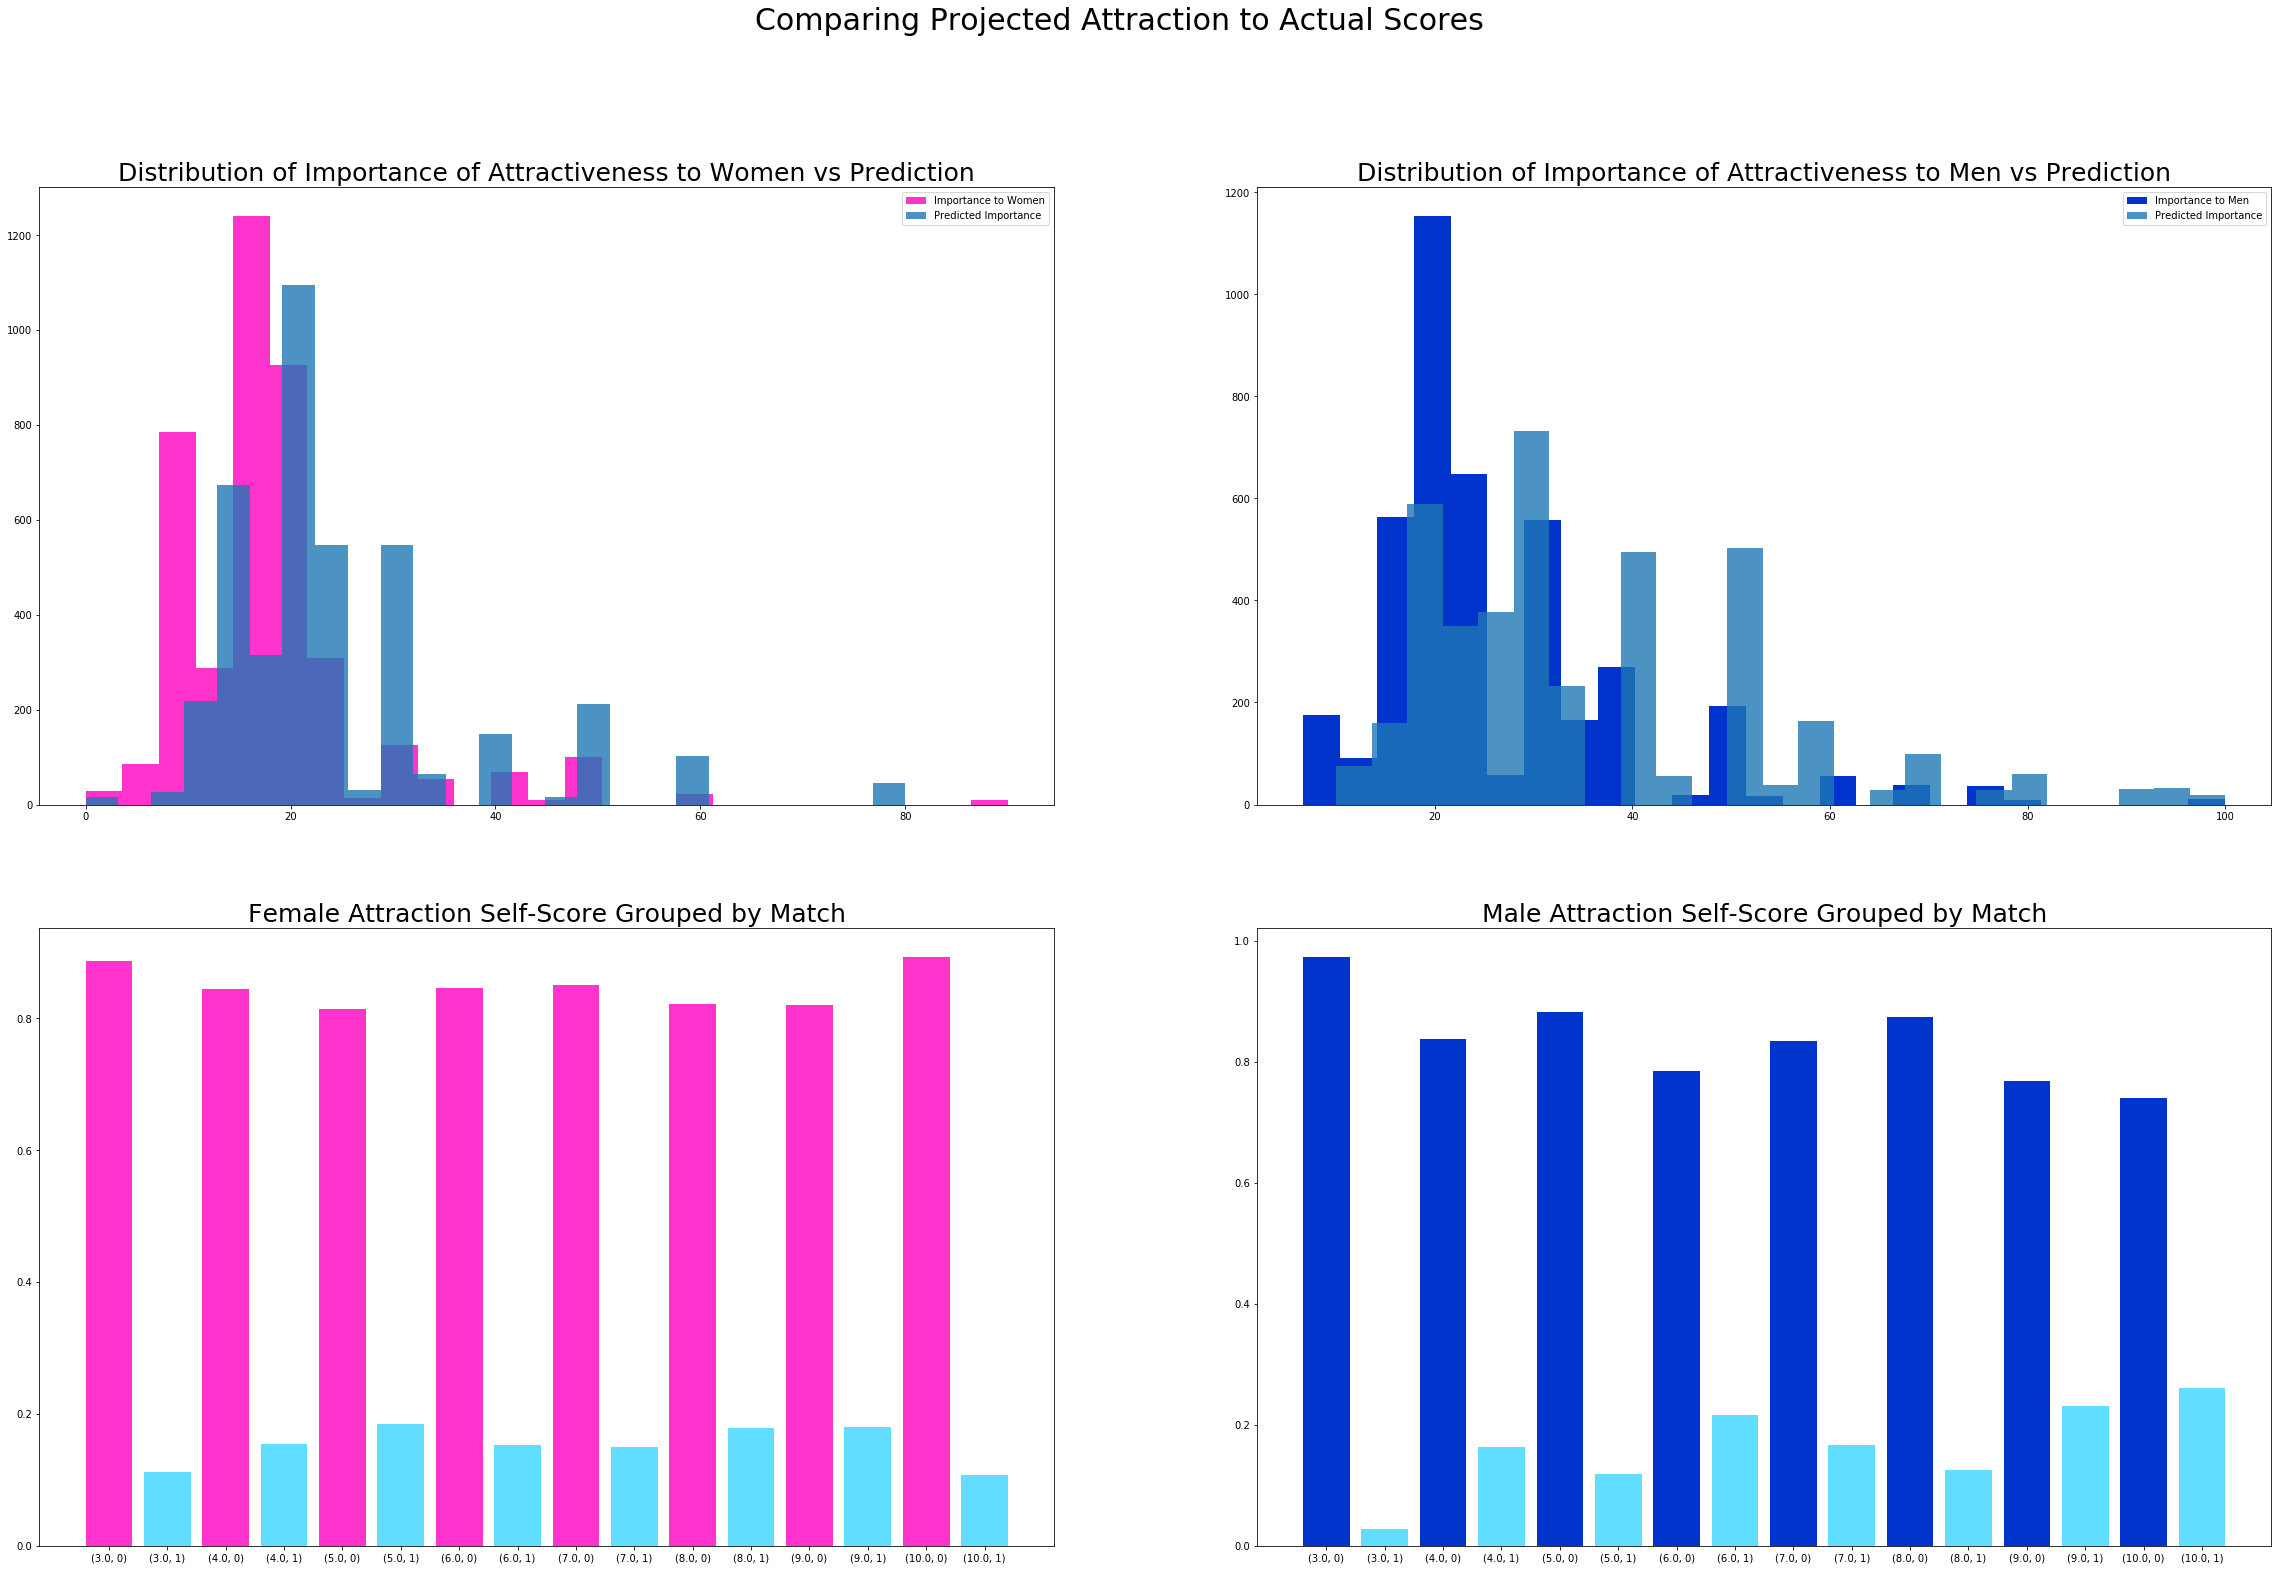

In [114]:
fig, ax =plt.subplots(2,2, figsize=(40,25))
fig.suptitle('Comparing Projected Attraction to Actual Scores', fontsize=30)
ax[0,0].hist(test_df[test_df.gender==0].attr1_1, bins=25, label='Importance to Women', color='#FF34CD')
ax[0,0].hist(test_df[test_df.gender==1].attr2_1, bins=25, label='Predicted Importance', alpha=0.8)
ax[0,0].set_title('Distribution of Importance of Attractiveness to Women vs Prediction', fontsize=25)
ax[0,0].legend()
ax[0, 1].hist(test_df[test_df.gender==1].attr1_1, bins=25, label='Importance to Men', color='#0034CD')
ax[0, 1].hist(test_df[test_df.gender==0].attr2_1, bins=25, label= 'Predicted Importance', alpha=0.8)
ax[0, 1].set_title('Distribution of Importance of Attractiveness to Men vs Prediction', fontsize=25)
ax[0,1].legend()
ax[1,0].bar(x=range(len(f_heights[1:])), height = f_heights[1:],  color=['#FF34CD','#60DDFF'])
ax[1,0].set_xticks(range(len(f_heights[1:])))
ax[1,0].set_xticklabels(labels=f_labels[1:])
ax[1,0].set_title('Female Attraction Self-Score Grouped by Match', fontsize=25)
ax[1,1].bar(x=range(len(m_heights[1:])), height=m_heights[1:], color=['#0034CD','#60DDFF'] )
ax[1,1].set_xticks(range(len(m_heights[1:])))
ax[1,1].set_xticklabels(labels=m_labels[1:])
ax[1,1].set_title('Male Attraction Self-Score Grouped by Match', fontsize=25)
plt.savefig('attractionscores.png')
plt.show()

In [95]:
test_df.columns

Index(['match', 'iid', 'gender', 'wave', 'round', 'order', 'partner', 'pid', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1'], dtype='object')

In [96]:
f_fun_heights=list(test_df[(test_df.gender==0)].groupby(['fun3_1']).match.value_counts(normalize=True))
f_fun_labels=list(test_df[(test_df.gender==0)].groupby(['fun3_1']).match.value_counts(normalize=True).index)
m_fun_heights=list(test_df[(test_df.gender==1)].groupby(['fun3_1']).match.value_counts(normalize=True))
m_fun_labels=list(test_df[(test_df.gender==1)].groupby(['fun3_1']).match.value_counts(normalize=True).index)

In [98]:
test_df[(test_df.gender==0)].groupby(['fun3_1']).match.value_counts(normalize=True)

fun3_1  match
2.0     0        0.833333
        1        0.166667
3.0     0        0.833333
        1        0.166667
4.0     0        0.766667
        1        0.233333
5.0     0        0.903448
        1        0.096552
6.0     0        0.832905
        1        0.167095
7.0     0        0.837237
        1        0.162763
8.0     0        0.826395
        1        0.173605
9.0     0        0.845624
        1        0.154376
10.0    0        0.826180
        1        0.173820
Name: match, dtype: float64

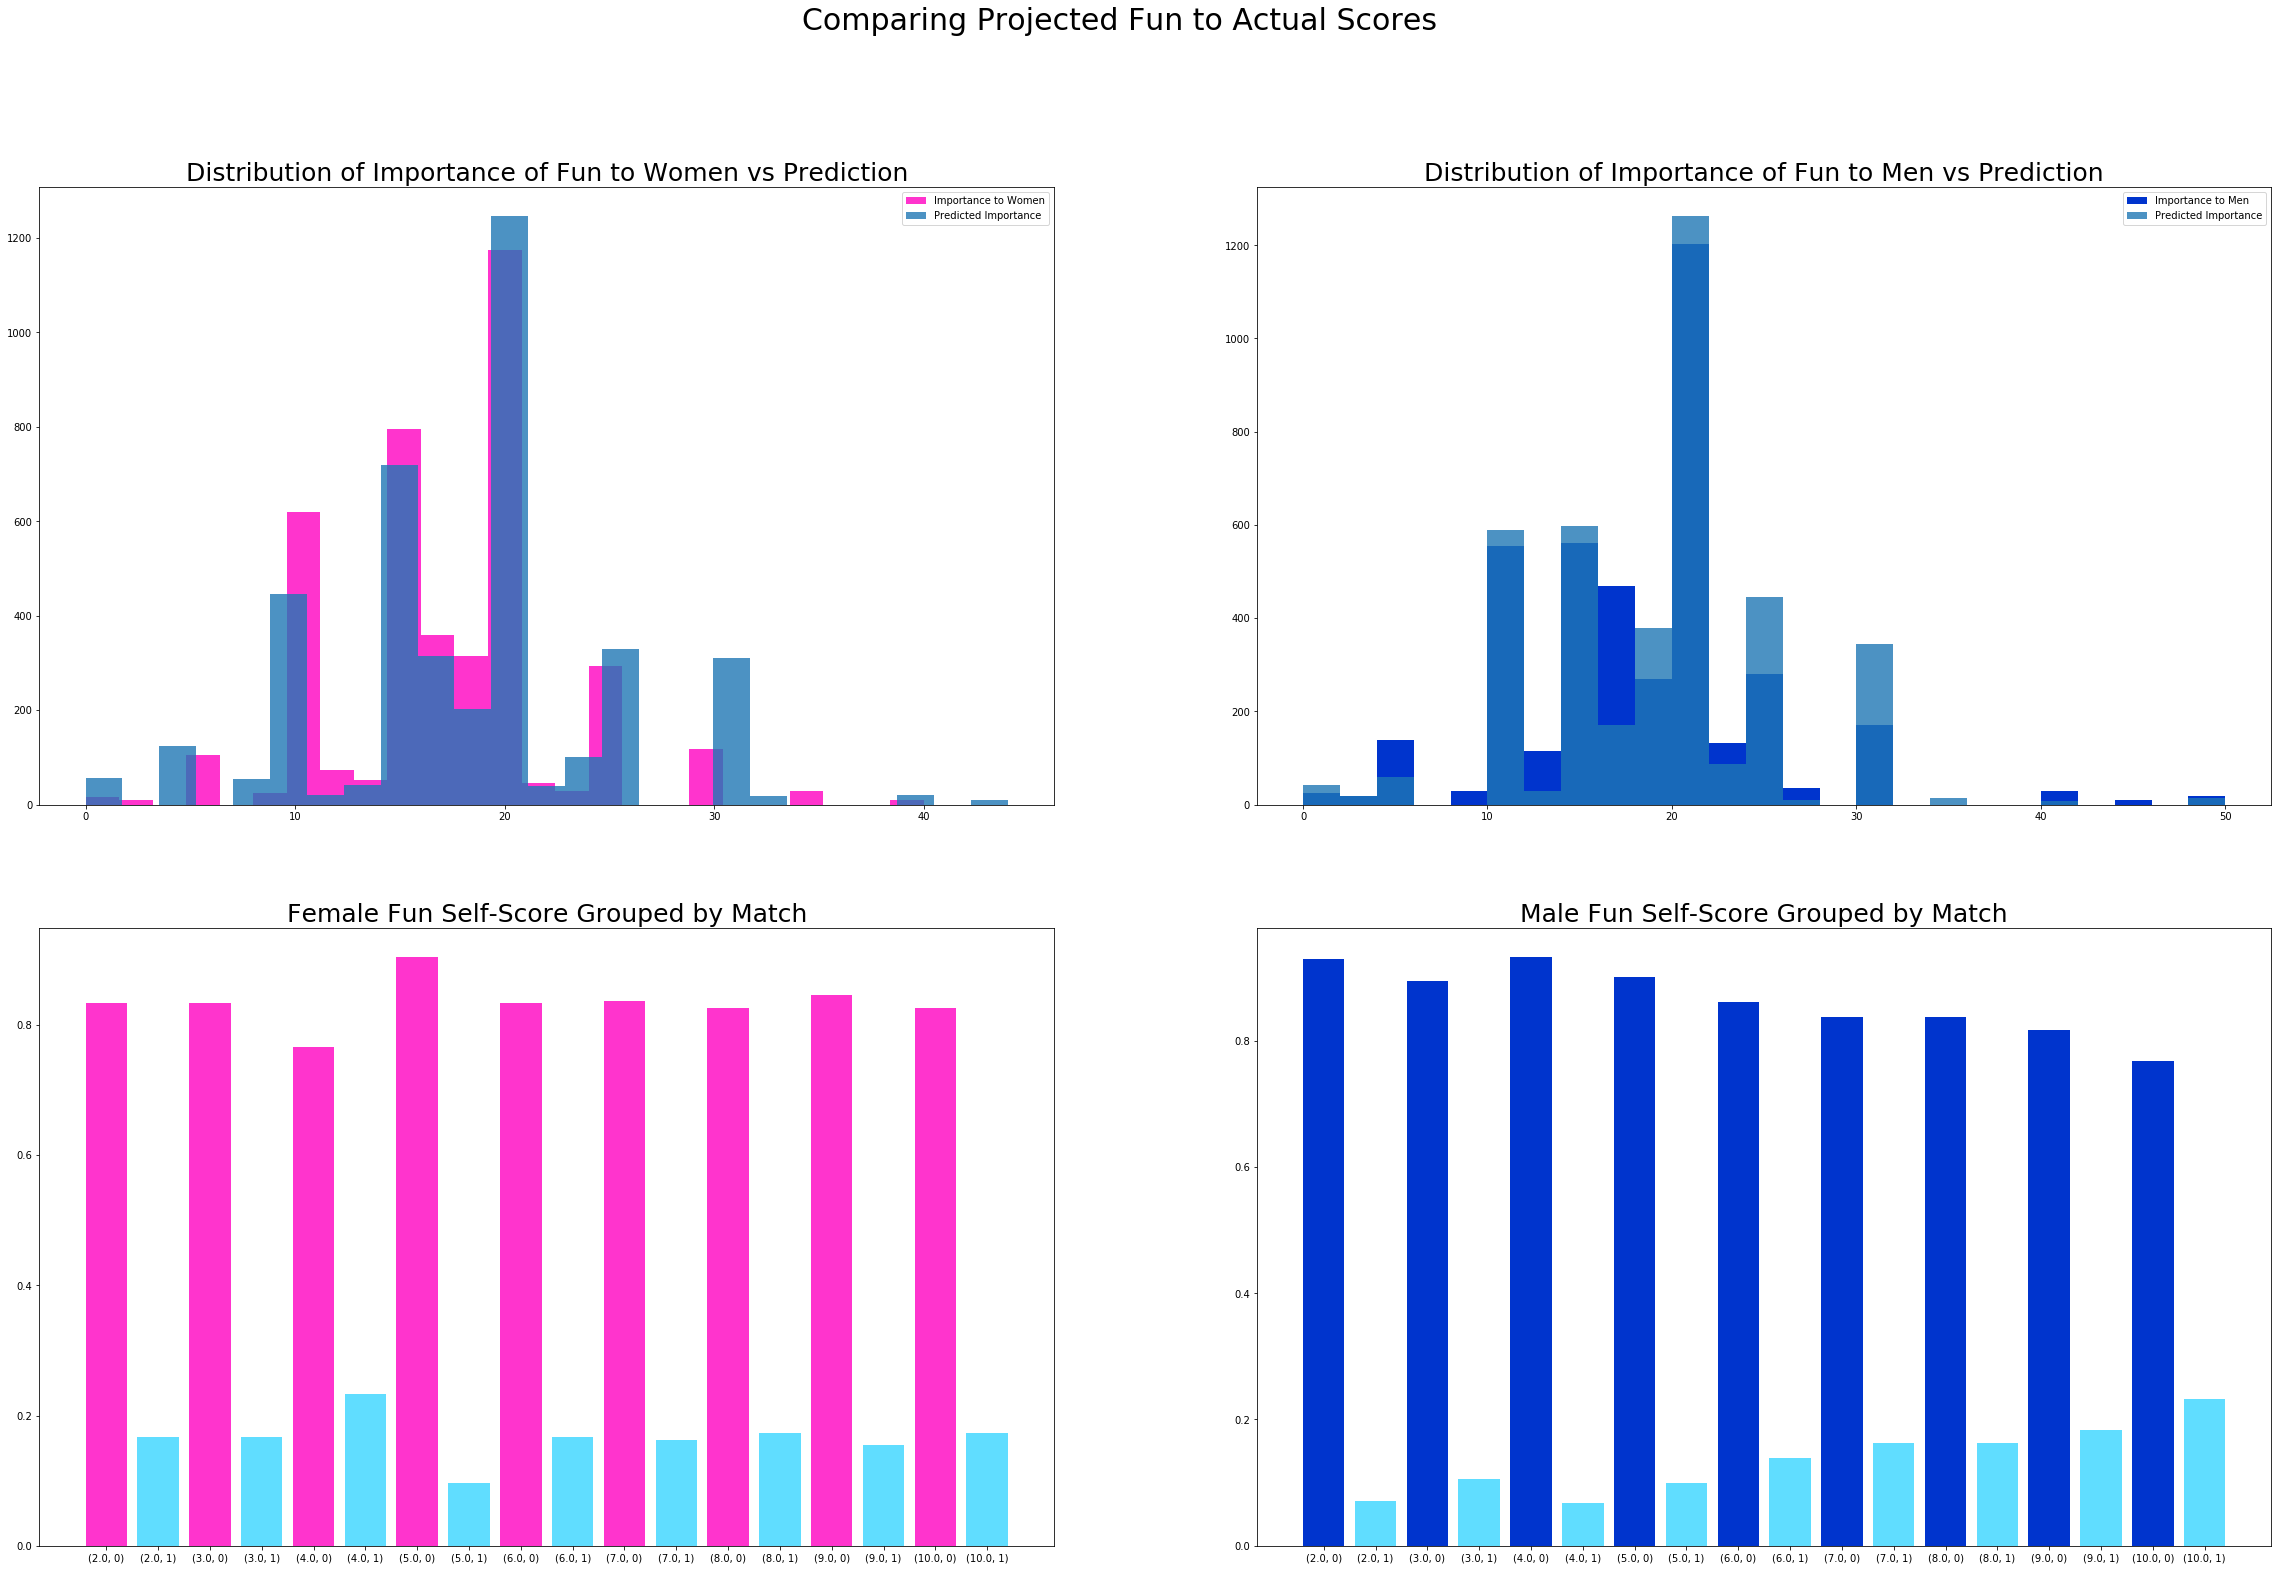

In [115]:
fig, ax =plt.subplots(2,2, figsize=(40,25))
fig.suptitle('Comparing Projected Fun to Actual Scores', fontsize=30)
ax[0,0].hist(test_df[test_df.gender==0].fun1_1, bins=25, label='Importance to Women', color='#FF34CD')
ax[0,0].hist(test_df[test_df.gender==1].fun2_1, bins=25, label='Predicted Importance', alpha=0.8)
ax[0,0].set_title('Distribution of Importance of Fun to Women vs Prediction', fontsize=25)
ax[0,0].legend()
ax[0, 1].hist(test_df[test_df.gender==1].fun1_1, bins=25, label='Importance to Men', color='#0034CD')
ax[0, 1].hist(test_df[test_df.gender==0].fun2_1, bins=25, label= 'Predicted Importance', alpha=0.8)
ax[0, 1].set_title('Distribution of Importance of Fun to Men vs Prediction', fontsize=25)
ax[0,1].legend()
ax[1,0].bar(x=range(len(f_fun_heights)), height = f_fun_heights,  color=['#FF34CD','#60DDFF'])
ax[1,0].set_xticks(range(len(f_fun_heights)))
ax[1,0].set_xticklabels(labels=f_fun_labels)
ax[1,0].set_title('Female Fun Self-Score Grouped by Match', fontsize=25)
ax[1,1].bar(x=range(len(m_fun_heights)), height=m_fun_heights, color=['#0034CD','#60DDFF'] )
ax[1,1].set_xticks(range(len(m_fun_heights)))
ax[1,1].set_xticklabels(labels=m_fun_labels)
ax[1,1].set_title('Male Fun Self-Score Grouped by Match', fontsize=25)
plt.savefig('funscores.png')
plt.show()

In [103]:
f_sinc_heights=list(test_df[(test_df.gender==0)].groupby(['sinc3_1']).match.value_counts(normalize=True))
f_sinc_labels=list(test_df[(test_df.gender==0)].groupby(['sinc3_1']).match.value_counts(normalize=True).index)
m_sinc_heights=list(test_df[(test_df.gender==1)].groupby(['sinc3_1']).match.value_counts(normalize=True))
m_sinc_labels=list(test_df[(test_df.gender==1)].groupby(['sinc3_1']).match.value_counts(normalize=True).index)

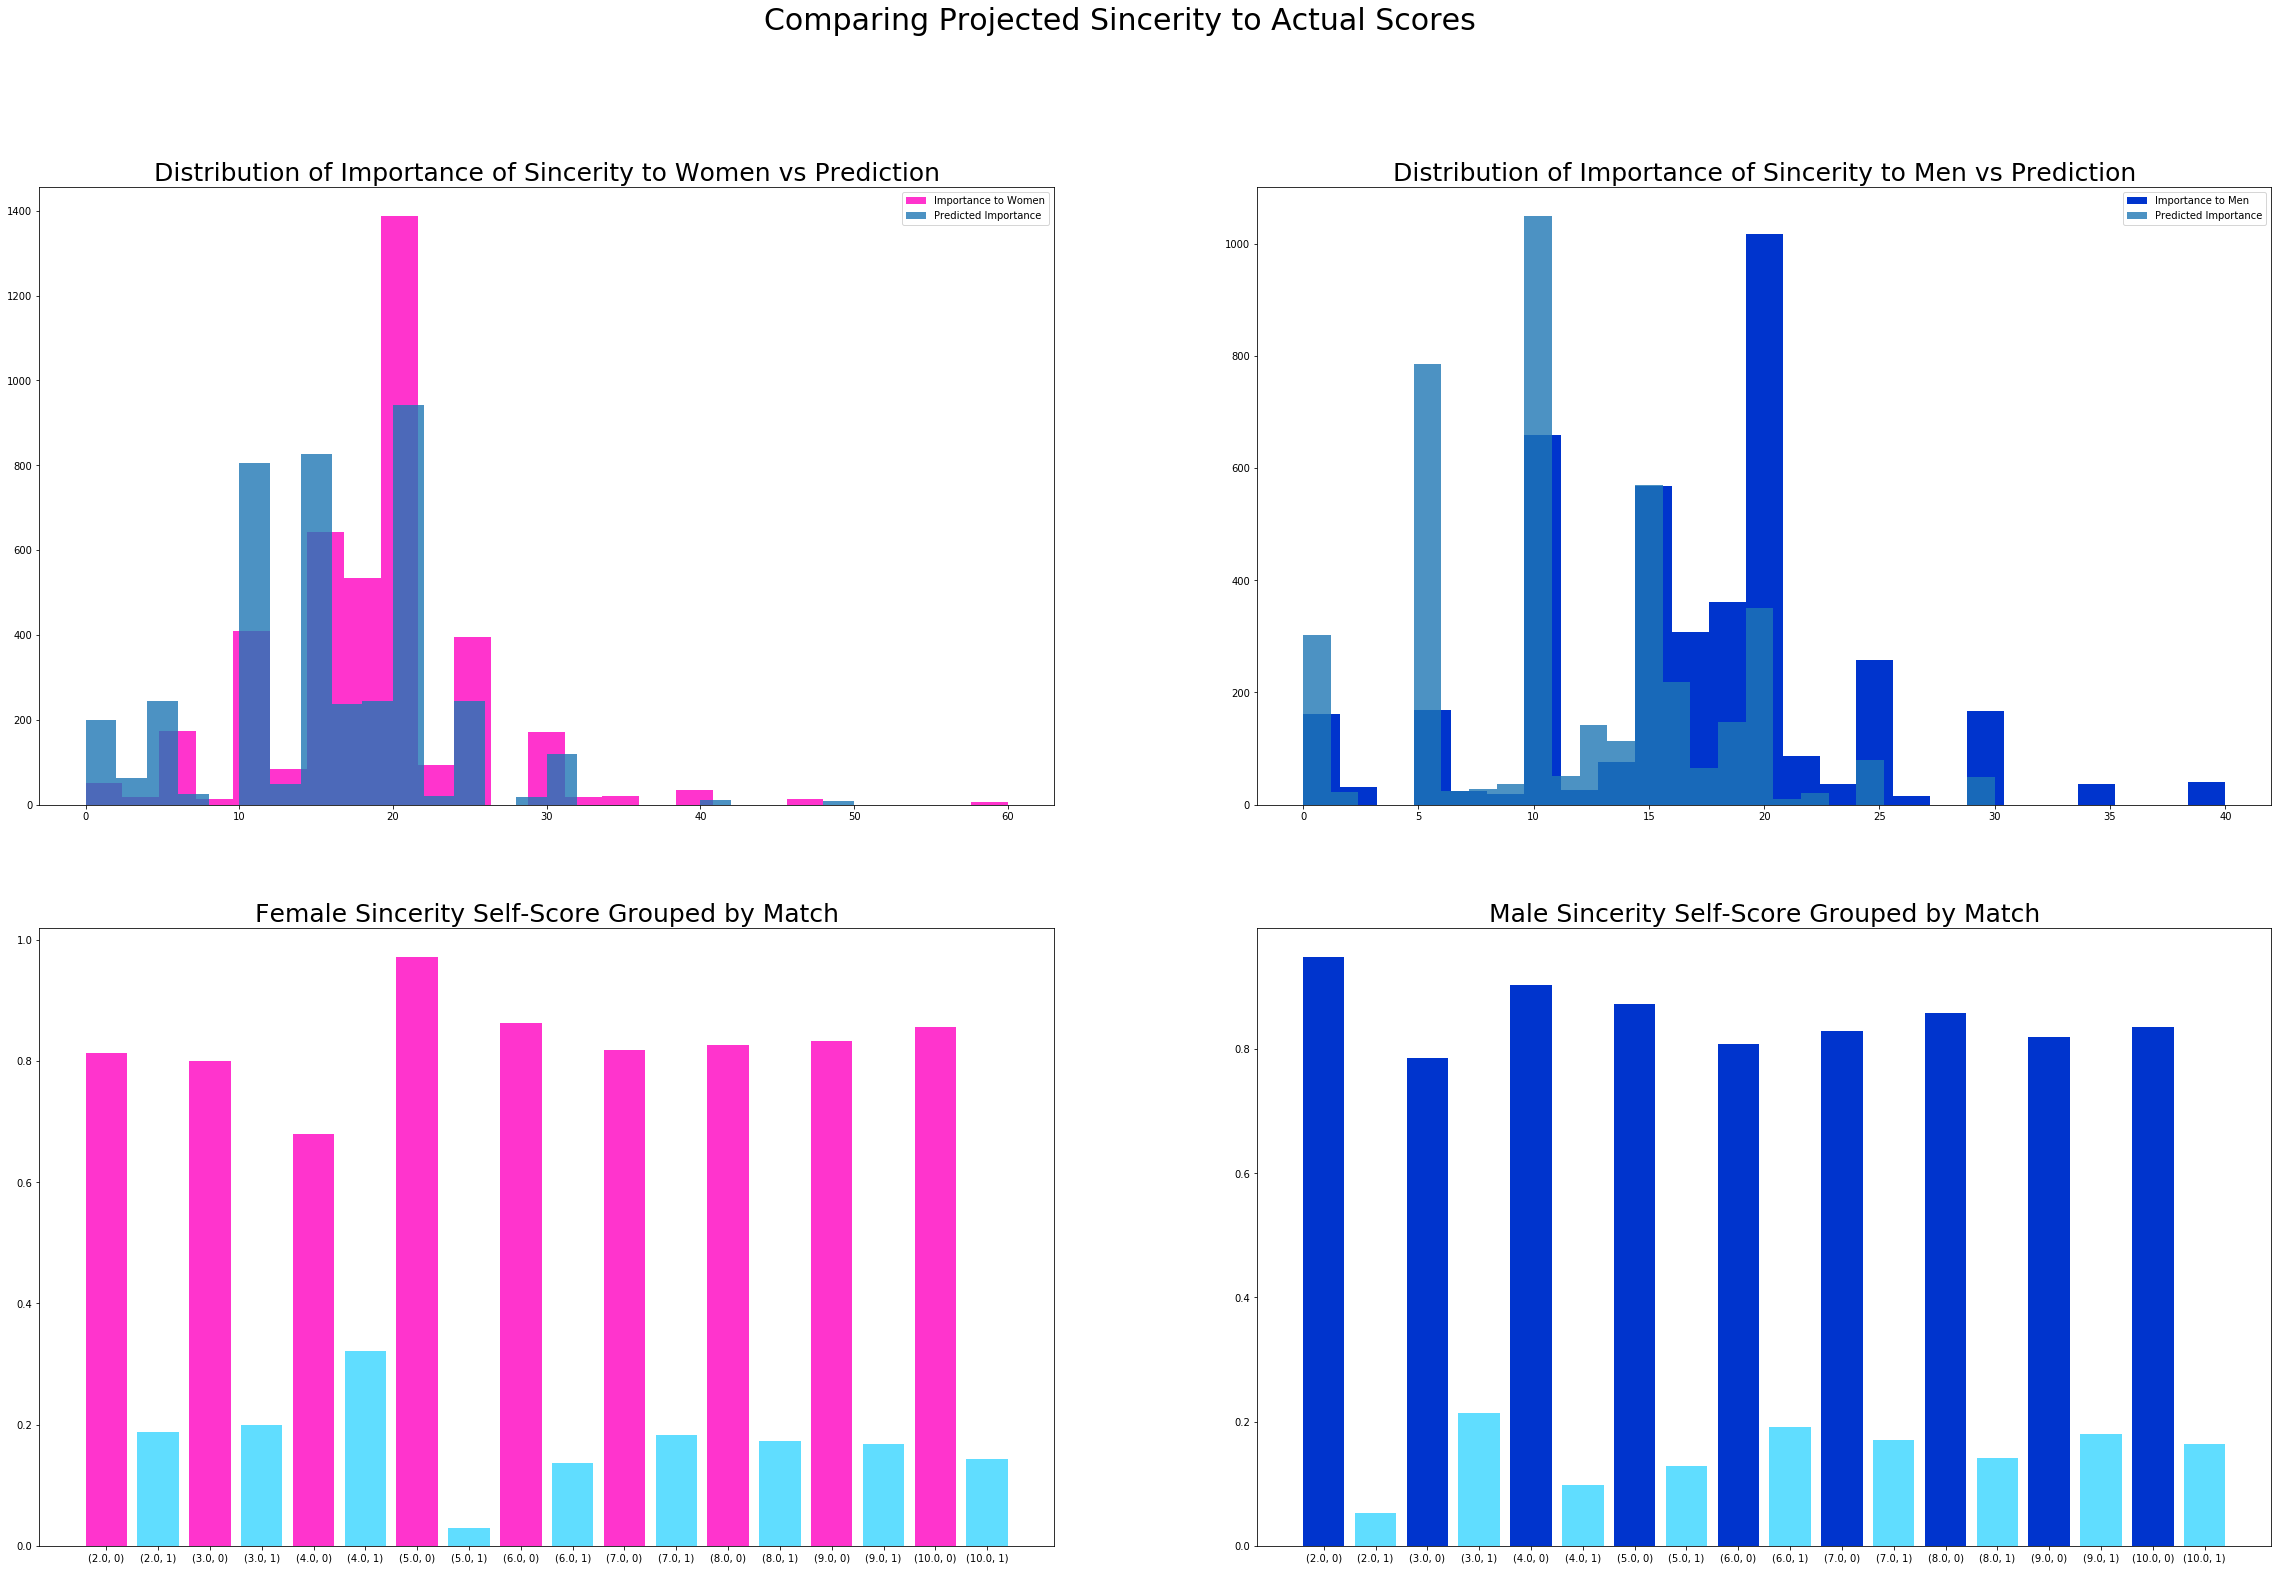

In [116]:
fig, ax =plt.subplots(2,2, figsize=(40,25))
fig.suptitle('Comparing Projected Sincerity to Actual Scores', fontsize=30)
ax[0,0].hist(test_df[test_df.gender==0].sinc1_1, bins=25, label='Importance to Women', color='#FF34CD')
ax[0,0].hist(test_df[test_df.gender==1].sinc2_1, bins=25, label='Predicted Importance', alpha=0.8)
ax[0,0].set_title('Distribution of Importance of Sincerity to Women vs Prediction', fontsize=25)
ax[0,0].legend()
ax[0, 1].hist(test_df[test_df.gender==1].sinc1_1, bins=25, label='Importance to Men', color='#0034CD')
ax[0, 1].hist(test_df[test_df.gender==0].sinc2_1, bins=25, label= 'Predicted Importance', alpha=0.8)
ax[0, 1].set_title('Distribution of Importance of Sincerity to Men vs Prediction', fontsize=25)
ax[0,1].legend()
ax[1,0].bar(x=range(len(f_sinc_heights)), height = f_sinc_heights,  color=['#FF34CD','#60DDFF'])
ax[1,0].set_xticks(range(len(f_sinc_heights)))
ax[1,0].set_xticklabels(labels=f_sinc_labels)
ax[1,0].set_title('Female Sincerity Self-Score Grouped by Match', fontsize=25)
ax[1,1].bar(x=range(len(m_sinc_heights)), height=m_sinc_heights, color=['#0034CD','#60DDFF'] )
ax[1,1].set_xticks(range(len(m_sinc_heights)))
ax[1,1].set_xticklabels(labels=m_sinc_labels)
ax[1,1].set_title('Male Sincerity Self-Score Grouped by Match', fontsize=25)
plt.savefig('sincerity.png')
plt.show()

[Text(0, 0, '(1.0, 0)'),
 Text(0, 0, '(1.0, 1)'),
 Text(0, 0, '(2.0, 0)'),
 Text(0, 0, '(2.0, 1)'),
 Text(0, 0, '(3.0, 0)'),
 Text(0, 0, '(3.0, 1)'),
 Text(0, 0, '(4.0, 0)'),
 Text(0, 0, '(4.0, 1)'),
 Text(0, 0, '(6.0, 0)'),
 Text(0, 0, '(6.0, 1)')]

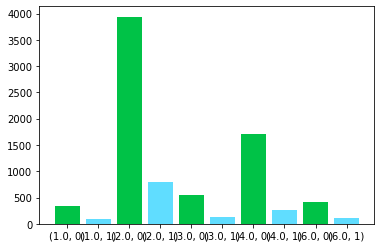

In [128]:
fig, ax=plt.subplots()
ax.bar(x=range(len(df.groupby('race').match.value_counts())), height=df.groupby('race').match.value_counts(), color=['#00C247','#60DDFF'])
ax.set_xticks(range(len(df.groupby('race').match.value_counts())))
ax.set_xticklabels(df.groupby('race').match.value_counts().index)
[]

In [131]:
test_df[test_df.gender==1].attr1_1.std()

12.927468666201207

In [141]:
test_df[test_df.gender==0].attr1_1

0       15.0
1       15.0
2       15.0
3       15.0
4       15.0
        ... 
7655    20.0
7656    20.0
7657    20.0
7658    20.0
7659    20.0
Name: attr1_1, Length: 4066, dtype: float64

In [143]:
#Statistical Test for Gender prediction on Opposite Gender's Valuation of Attraction
sample_f_mean = test_df[test_df.gender==0].attr1_1.mean()
projected_f_mean= test_df[test_df.gender==1].attr2_1.mean()
f_n=len(test_df[test_df.gender==0].iid.unique())
f_std=test_df[test_df.gender==1].attr1_1.std()
#Ho population mean = project_f_mean
#Ha population mean ≠ projected_f_mean
z_crit=1.65
(sample_f_mean - projected_f_mean)/(f_std/(f_n)**0.5)


-8.385709765383108

In [144]:
sample_m_mean = test_df[test_df.gender==1].attr1_1.mean()
projected_m_mean= test_df[test_df.gender==0].attr2_1.mean()
m_n=len(test_df[test_df.gender==1].iid.unique())
m_std=(test_df[test_df.gender==1].attr1_1.std())
#Ho population mean = projected_m_mean
#Ha population mean ≠ projected_m_mean
(sample_m_mean-projected_m_mean)/(m_std/(m_n)**0.5)

-11.615967529223004

In [151]:
test_df[(test_df.gender==0)].groupby(['attr3_1']).match.value_counts()[10].sum()

65

In [155]:
#two proportion t-test
#Ho p1=p2
#Ha p1≠p2

mp=test_df[(test_df.gender==1)].groupby(['attr3_1']).match.value_counts(normalize=True)[10][1]
fp=test_df[(test_df.gender==0)].groupby(['attr3_1']).match.value_counts(normalize=True)[10][1]
mn=test_df[(test_df.gender==1)].groupby(['attr3_1']).match.value_counts()[10].sum()
fn=test_df[(test_df.gender==0)].groupby(['attr3_1']).match.value_counts()[10].sum()
p_hat=(test_df[(test_df.gender==0)].groupby(['attr3_1']).match.value_counts()[10][1]+test_df[(test_df.gender==1)].groupby(['attr3_1']).match.value_counts()[10][1])/(mn+fn)
(mp-fp)/(p_hat*(1-p_hat)*(1/mn+1/fn))**0.5
#there was a greater proportion of men who rated themselves 10 and matched than women who rated themselves 10 and matched

2.56422916275023

# Feature Engineering

In [159]:
male_ratings = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'imprace', 'imprelig', 'exphappy', 'expnum']
new_columns = ['p'+attribute for attribute in male_ratings]


In [160]:
for i in range(len(new_columns)):
    test_df[new_columns[i]]= test_df.pid.apply(lambda x: test_df[test_df.iid==x][male_ratings[i]].iloc[0] if len(test_df[test_df.iid==x][male_ratings[i]])!=0 else None)

In [161]:
test_df.dropna(inplace=True)
test_df = test_df[test_df.gender==0].reset_index()

In [156]:
test_df['age_difference']=test_df.age_o - test_df.age

In [157]:
test_df['female_bal']=np.where((test_df.attr1_1==0)|(test_df.sinc1_1==0)|(test_df.intel1_1==0)|(test_df.fun1_1==0)|(test_df.amb1_1==0),0,1)
test_df['male_bal']=np.where((test_df.pf_o_att==0)|(test_df.pf_o_sin==0)|(test_df.pf_o_int==0)|(test_df.pf_o_fun==0)|(test_df.pf_o_amb==0),0,1)

In [162]:
test_df['female_conformity']= ((test_df.attr1_1 - test_df.pattr2_1)**2+(test_df.sinc1_1 - test_df.psinc2_1)**2+(test_df.intel1_1 - test_df.pintel2_1)**2+(test_df.fun1_1 - test_df.pfun2_1)**2+(test_df.amb1_1 - test_df.pamb2_1)**2+(test_df.shar1_1 - test_df.pshar2_1)**2)**0.5
test_df['male_conformity']=((test_df.pf_o_att - test_df.attr2_1)**2+(test_df.pf_o_sin - test_df.sinc2_1)**2+(test_df.pf_o_int - test_df.intel2_1)**2+(test_df.pf_o_fun- test_df.fun2_1)**2+(test_df.pf_o_amb - test_df.amb2_1)**2+(test_df.pf_o_sha - test_df.shar2_1)**2)**0.5

In [163]:
test_df.to_csv('finaldata.csv')